# Lab: Titanic EDA

This week was all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

In the [notebook](./Titanic.ipynb) provided, do the following:

1. Import `pandas` and `matplotlib.pyplot`
2. Load [train.csv](./train.csv) as a `pandas` DataFrame.
3. In each of the following sections, copy the question as a python comment, then answer the question with your own code.
4. Refer to the [Titanic Kaggle competition](https://www.kaggle.com/c/titanic/data) if you need an explanation for any of the columns.

In [1]:
#1. Import pandas and matplotlib.pyplot
import pandas as pd
import numpy as np
import missingno

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2. Load train.csv as a pandas DataFrame.
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Cleaning the data

1. Create a bar chart showing how many missing values are in each column
    - *Bonus* : Theres a good library for visualizing missing values called Missingno.
        - [Install Instructions](https://pypi.org/project/missingno/)
        - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

**Note: `NaN`, empty, and missing are synonymous.**

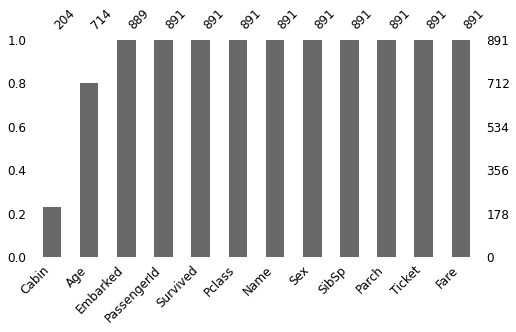

In [4]:
#1. Create a bar chart showing how many missing values are in each column
#  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
#      - [Install Instructions](https://pypi.org/project/missingno/)
#      - [Usage Documentation](https://github.com/ResidentMario/missingno)

missingno.bar(df,
              figsize = (8, 4),
              fontsize = 12,
              sort = 'ascending');

In [5]:
#2. Which column has the most `NaN` values? How many cells in that column are empty?
df.isna().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
#3. Delete all rows where `Embarked` is empty
df.dropna(subset = ['Embarked'], inplace = True)

In [7]:
df['Embarked'].isna().sum()

0

In [8]:
#4. Fill all empty cabins with **¯\\_(ツ)_/¯**
#https://towardsdatascience.com/difference-between-apply-and-transform-in-pandas-242e5cf32705

df['Cabin'].fillna(value = '**¯\\_(ツ)_/¯**', inplace = True)

In [9]:
df['Cabin'].isna().sum()

0

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`:
    - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
    - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
    - Do the same thing for `Sex`
    - BONUS: Extract the title from everyone's name and create dummy columns

In [10]:
#1.  There are two columns that pertain to how many family members are on the boat for a given person.
#Create a new column called `FamilyCount` which will be the sum of those two columns.
df[['SibSp', 'Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [11]:
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [12]:
df[['SibSp', 'Parch', 'FamilyCount']].head()

,SibSp,Parch,FamilyCount
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [13]:
#2. Reverends have a special title in their name. 
#Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
df['IsReverend'] = np.where(df['Name'].str.contains('Rev'), 1, 0)
df[['IsReverend']].head()

,IsReverend
0,0
1,0
2,0
3,0
4,0


In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,S,0,0


In [15]:
#3. In order to feed our training data into a classification algorithm, 
#we need to convert our categories into 1's and 0's using `pd.get_dummies`
#  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. 
#    These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
#  - Do the same thing for `Sex`
#  - BONUS: Extract the title from everyone's name and create dummy columns

In [16]:
df = pd.get_dummies(df, columns = ['Embarked', 'Sex'])

In [17]:
#  - BONUS: Extract the title from everyone's name and create dummy columns
df['Title'] = df['Name'].map(lambda x: x.split(', ')[1].split('.')[0])

df = pd.get_dummies(data = df,
                    columns = ['Title'],
                    drop_first = True)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,**¯\_(ツ)_/¯**,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,**¯\_(ツ)_/¯**,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,**¯\_(ツ)_/¯**,...,0,0,0,0,1,0,0,0,0,0


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [19]:
#1. What was the survival rate overall?
df['Survived'].mean() * 100

38.24521934758155

- The overall survival rate was 38.25%

In [20]:
#2. Which gender fared the worst? What was their survival rate?
df.groupby('Sex_female')['Survived'].mean()

Sex_female
0    0.188908
1    0.740385
Name: Survived, dtype: float64

- The survival rate for men was 18.89%
- The survival rate for women was 74.04%

In [21]:
#3. What was the survival rate for each `Pclass`?
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

- The survival rate for first class was 62.62%
- The survival rate for second class was 47.28%
- The survival rate for third class was 24.24%

In [22]:
#4. Did any reverends survive? How many?
df[df['IsReverend'] == 1]['Survived'].mean()

0.0

- None of the Reverend's aboard the Titanic survived

In [23]:
#5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
df[df['Cabin'] == '**¯\\_(ツ)_/¯**']['Survived'].mean()

0.29985443959243085

- The survival rate for individuals where Cabin information was NA was 29.99%

In [24]:
#6. What is the survival rate for people whose `Age` is empty?
df[df['Age'].isna()]['Survived'].mean()

0.2937853107344633

- The survival rate for individuals were no Age was recorded was 29.38%

In [25]:
#7. What is the survival rate for each port of embarkation?
df[df['Embarked_C'] == 1]['Survived'].mean()

0.5535714285714286

In [26]:
df[df['Embarked_Q'] == 1]['Survived'].mean()

0.38961038961038963

In [27]:
df[df['Embarked_S'] == 1]['Survived'].mean()

0.33695652173913043

- The survival rate for individuals embarking from 'C' was 38.96%
- The survival rate for individuals embarking from 'Q' was 38.96%
- The survival rate for individuals embarking from 'S' was 33.70%

In [28]:
#8. What is the survival rate for children (under 12) in each `Pclass`?
df[df['Age'] < 12].groupby('Pclass')['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

- The survival rate for 1st Class passengers under 12 was 75.00%
- The survival rate for 2nd Class passengers under 12 was 100%
- The survival rate for 3rd Class passengers under 12 was 40.43%

In [29]:
#9. Did the captain of the ship survive? Is he on the list?
df[df['Name'].str.contains('Capt')]['Survived']

745    0
Name: Survived, dtype: int64

- The Captain of the RMS Titanic did not survive the sinking of the ship. 

In [30]:
#10. Of all the people that died, who had the most expensive ticket? How much did it cost?
df[df['Survived'] == 0].sort_values(by = 'Fare', 
                                    ascending = False)[:2]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0,C23 C25 C27,...,0,0,0,0,1,0,0,0,0,0
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0,C23 C25 C27,...,0,0,0,0,1,0,0,0,0,0


- Among those onbroad the Titanic who perished, both Mr. Charles Alexander Fortune and Mr. Mark Fortune paid the most price for their tickets: $263.00

In [31]:
#11. Does having family on the boat help or hurt your chances of survival?
df.groupby('FamilyCount')['Survived'].mean()

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

- Provided you were traveling with one to three people in your family, you had better chance at survival than the overall rate.

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. 

It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

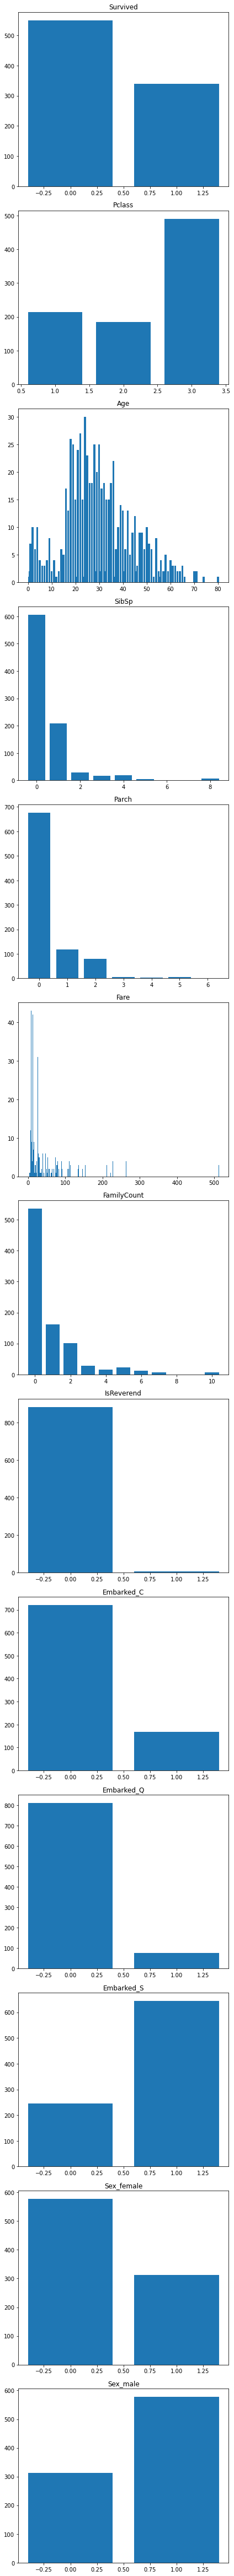

In [32]:
#basic barcharts for counts of all but 'title' variables
plot_columns = ['Survived', 'Pclass', 'Age', 'SibSp',
               'Parch', 'Fare', 'FamilyCount', 'IsReverend',
               'Embarked_C', 'Embarked_Q', 'Embarked_S', 
               'Sex_female', 'Sex_male']

fig, axs = plt.subplots(nrows = len(plot_columns),
                        ncols = 1,
                        figsize=(6, 65))

for i, column in enumerate(plot_columns):
    axs[i].bar(x = df[column].value_counts().sort_index().keys(),
               height = df[column].value_counts().sort_index().values)
    axs[i].set_title(column)

fig.tight_layout();

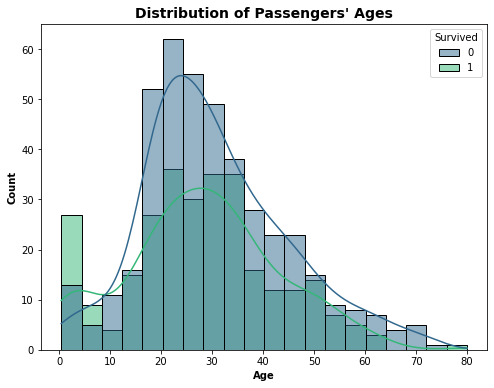

In [97]:
#more complex charts below:
plt.figure(figsize = (8, 6))

plt.title("Distribution of Passengers' Ages",
          fontsize = 14,
          fontweight = 'bold')

sns.histplot(data = df,
             x = 'Age',
             hue = 'Survived',
             palette = 'viridis',
             kde = True)

plt.xlabel('Age',
           fontweight = 'bold')

plt.ylabel('Count',
           fontweight = 'bold');

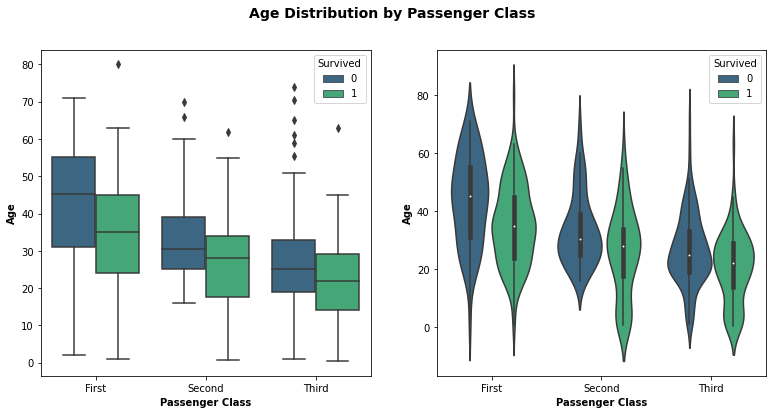

In [67]:
#more complex charts below:
fig, axs = plt.subplots(nrows = 1,
                        ncols = 2,
                        figsize = (13, 6))

plt.suptitle('Age Distribution by Passenger Class',
             fontsize = 14,
             fontweight = 'bold')

#plot1
sns.boxplot(x = df['Pclass'],
            y = df['Age'],
            hue = df['Survived'],
            palette = 'viridis',
            ax = axs[0])

axs[0].set_xlabel('Passenger Class',
                  fontweight = 'bold')
axs[0].set_xticklabels(labels = ['First', 'Second', 'Third'])
axs[0].set_ylabel('Age',
                  fontweight = 'bold')

#plot2
sns.violinplot(x = df['Pclass'],
               y = df['Age'],
               hue = df['Survived'],
               palette = 'viridis',
               ax = axs[1])

axs[1].set_xlabel('Passenger Class',
                  fontweight = 'bold')
axs[1].set_xticklabels(labels = ['First', 'Second', 'Third'])
axs[1].set_ylabel('Age',
                  fontweight = 'bold');

In [148]:
firstclassmean = df[df['Pclass'] == 1]['Fare'].mean()
firstclassmedian = df[df['Pclass'] == 1]['Fare'].median()

thirdclassmean = df[df['Pclass'] == 3]['Fare'].mean()
thirdclassmedian = df[df['Pclass'] == 3]['Fare'].median()

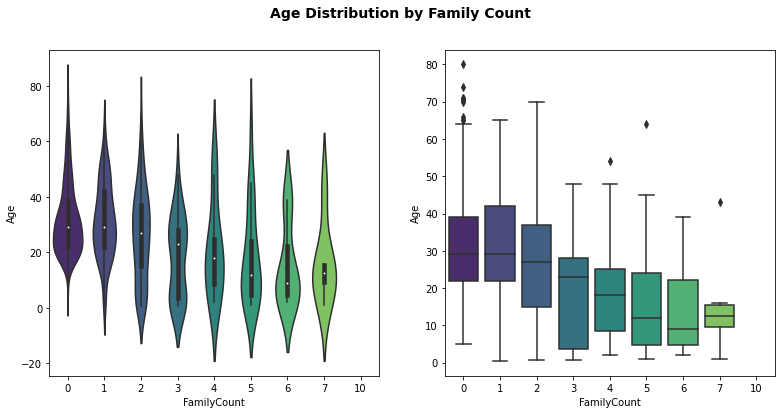

In [195]:
#more complex charts below:
fig, axs = plt.subplots(nrows = 1,
                        ncols = 2,
                        figsize = (13, 6))

plt.suptitle('Age Distribution by Family Count',
             fontsize = 14,
             fontweight = 'bold')

sns.violinplot(x = df['FamilyCount'],
               y = df['Age'],
               palette = 'viridis',
               ax = axs[0])

sns.boxplot(x = df['FamilyCount'],
            y = df['Age'],
            palette = 'viridis',
            ax = axs[1]);

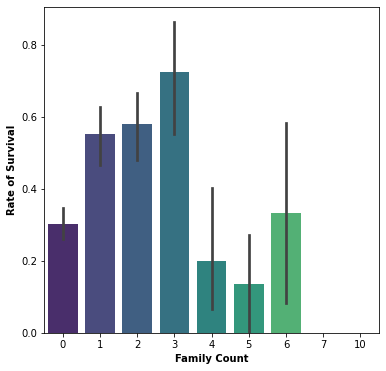

In [197]:
plt.figure(figsize=(6, 6))

sns.barplot(x = 'FamilyCount',
            y = 'Survived',
            palette = 'viridis',
            data = df)

plt.xlabel('Family Count', 
           fontweight = 'bold')

plt.ylabel('Rate of Survival', 
           fontweight = 'bold');

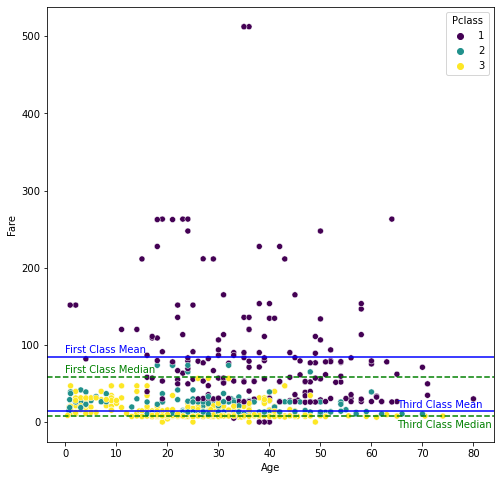

In [164]:
plt.figure(figsize = (8, 8))

sns.scatterplot(x = 'Age',
                y = 'Fare', 
                hue = 'Pclass',
                palette = 'viridis',
                data = df)

plt.axhline(y = firstclassmean, color = 'blue', linestyle = '-')
plt.text(0, firstclassmean + 5,'First Class Mean', color = 'blue')

plt.axhline(y = firstclassmedian, color = 'green', linestyle = '--')
plt.text(0, firstclassmedian + 5, 'First Class Median', color = 'green')

plt.axhline(y = thirdclassmean, color = 'blue', linestyle = '-')
plt.text(65, thirdclassmean + 5, 'Third Class Mean', color = 'blue')

plt.axhline(y = thirdclassmedian, color = 'green', linestyle = '--')
plt.text(65, thirdclassmedian - 15, 'Third Class Median', color = 'green')

plt.show()

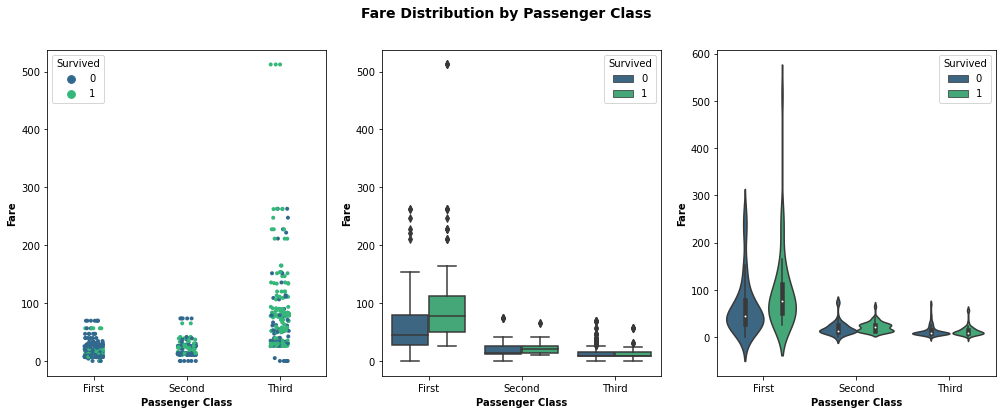

In [219]:
fig, axs = plt.subplots(nrows = 1,
                        ncols = 3,
                        figsize = (17, 6))

plt.suptitle('Fare Distribution by Passenger Class',
             fontsize = 14,
             fontweight = 'bold')

#plot0
sns.stripplot(x = 'Pclass',
              y = 'Fare',
              hue = 'Survived',
              order = [3, 2, 1],
              data = df, 
              palette = 'viridis',
              size = 4, 
              ax = axs[0])

axs[0].set_xlabel('Passenger Class',
                  fontweight = 'bold')
axs[0].set_xticklabels(labels = ['First', 'Second', 'Third'])
axs[0].set_ylabel('Fare',
                  fontweight = 'bold')

#plot1
sns.boxplot(x = df['Pclass'],
            y = df['Fare'],
            hue = df['Survived'],
            palette = 'viridis',
            ax = axs[1])

axs[1].set_xlabel('Passenger Class',
                  fontweight = 'bold')
axs[1].set_xticklabels(labels = ['First', 'Second', 'Third'])
axs[1].set_ylabel('Fare',
                  fontweight = 'bold')

#plot2
sns.violinplot(x = df['Pclass'],
               y = df['Fare'],
               hue = df['Survived'],
               palette = 'viridis',
               ax = axs[2])

axs[2].set_xlabel('Passenger Class',
                  fontweight = 'bold')
axs[2].set_xticklabels(labels = ['First', 'Second', 'Third'])
axs[2].set_ylabel('Fare',
                  fontweight = 'bold');

In [33]:
#for ease of reference
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilyCount', 'IsReverend', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male', 'Title_Col',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

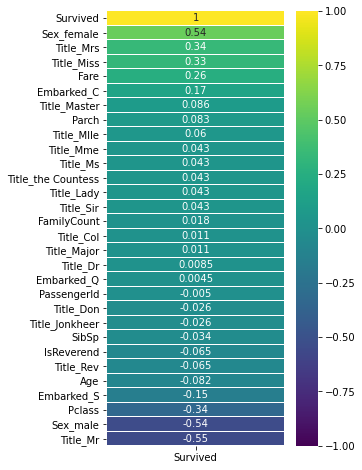

In [38]:
plt.figure(figsize = (4, 8))

sns.heatmap(data = df.corr().sort_values(by = 'Survived',
                                         ascending = False)[['Survived']],
            vmin = -1, 
            vmax = 1, 
            cmap = 'viridis',
            annot = True,
            linewidths = 0.1);

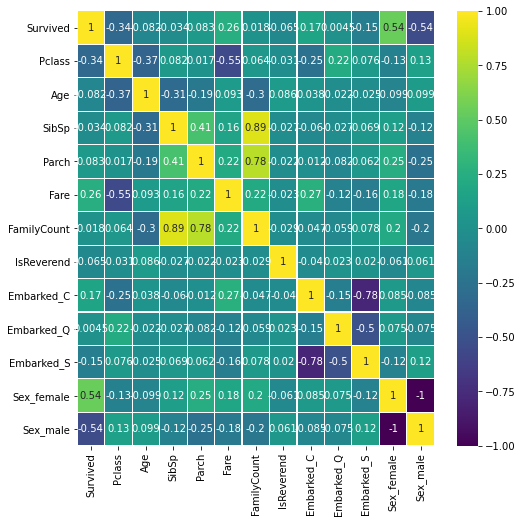

In [39]:
plt.figure(figsize = (8, 8))

sns.heatmap(data = df[['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
                       'Ticket', 'Fare', 'Cabin', 'FamilyCount', 'IsReverend', 'Embarked_C',
                       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']].corr(),
            vmin = -1, 
            vmax = 1, 
            cmap = 'viridis',
            annot = True,
            linewidths = 0.1);